# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src="https://i.imgur.com/49FNOHj.jpg">

# COLOURS CSV

In [30]:
#==========================================Import============================================================================#
import pandas as pd

colours_dataset= pd.read_csv("./Data/colors.csv")
colours_dataset.head()


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


### Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [31]:
#=================================================Challenge 1==============================================================#
colours_dataset.nunique()
            # Pulls the number of different types of things within the non- unique values 

id          135
name        135
rgb         124
is_trans      2
dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [32]:
# Can get the full table using this. 
colours_dataset.groupby("is_trans").count()

# Can also use boolean indexing using: 
colours_dataset[colours_dataset["is_trans"]=="t"].count()

# Can also pull the number of times each comes up including the nan values: 
colours_dataset["is_trans"].value_counts(dropna= False)

is_trans
f    107
t     28
Name: count, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

# Sets  CSV

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [33]:
#=============================================================Scoping of the data================================================================================#
# Import 
sets_dataset = pd.read_csv("./Data/sets.csv")


# General shape of the dataset
sets_dataset.head()
sets_dataset.tail() 
sets_dataset.shape
sets_dataset.columns

# Cehck to see if any of the column names needs to be adjsuted: 
    # No need to adjsut the names 

# Check the type of data as we may need to adjsut the type of the data it is 
print(sets_dataset.dtypes)

# check if there are missing values. 
sets_dataset.isna().sum()
    # No missing vlaues 




set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object


set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64

### Data Exploration 


**Challenge**: In which year were the first LEGO sets released and what were these sets called?


In [34]:

# Order them by the smallest
sets_dataset.sort_values( by= "year", ascending  = True, inplace= True)
print(sets_dataset)

#Pull the name and the year  of the olest sets released:
print(f" The oldest sets of lego was:{sets_dataset.iloc[0,1]}  built in  {sets_dataset.iloc[0, 2]}")



       set_num                               name  year  theme_id  num_parts
9545   700.B-1  Small Doors and Windows Set (ABB)  1949       371         12
9521   700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9539   700.3-1              Medium Gift Set (ABB)  1949       365        142
9544   700.A-1              Small Brick Set (ABB)  1949       371         24
9534   700.2-1               Large Gift Set (ABB)  1949       365        178
...        ...                                ...   ...       ...        ...
5399   41919-1                     Power Bracelet  2020       688         33
8217   60265-1             Ocean Exploration Base  2020        52        495
11335  75547-1           Minion Pilot in Training  2021       689          0
11337  75550-1             Minions Kung Fu Battle  2021       689          0
11334  75546-1               Minions in Gru’s Lab  2021       689          0

[15710 rows x 5 columns]
 The oldest sets of lego was:Small Doors and Windo

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [35]:
sets_dataset[ sets_dataset["year"]==1949].nunique() 
        # 

set_num      5
name         5
year         1
theme_id     2
num_parts    4
dtype: int64

**Challenge**: Find the top 5 LEGO sets  with the most number of parts.

In [36]:
sets_dataset.sort_values( by= "num_parts", ascending = False).head()
                    # Once in place is finished. The dataset will return none. So adding it in will do None.head()
                    #  Therefore its best to just do the functions 

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 


In [37]:
# Group by and the use of the aggregate function 
sets_dataset1 = sets_dataset.groupby("year").agg({"set_num":"count"})
                                        # Can add a list to both to work out the details 

# Using it to access the values 
diff =  sets_dataset1.loc[2019, "set_num"] - sets_dataset1.loc[1955, "set_num"]
print(diff)
print(sets_dataset1)

812
      set_num
year         
1949        5
1950        6
1953        4
1954       14
1955       28
...       ...
2017      786
2018      816
2019      840
2020      674
2021        3

[71 rows x 1 columns]


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

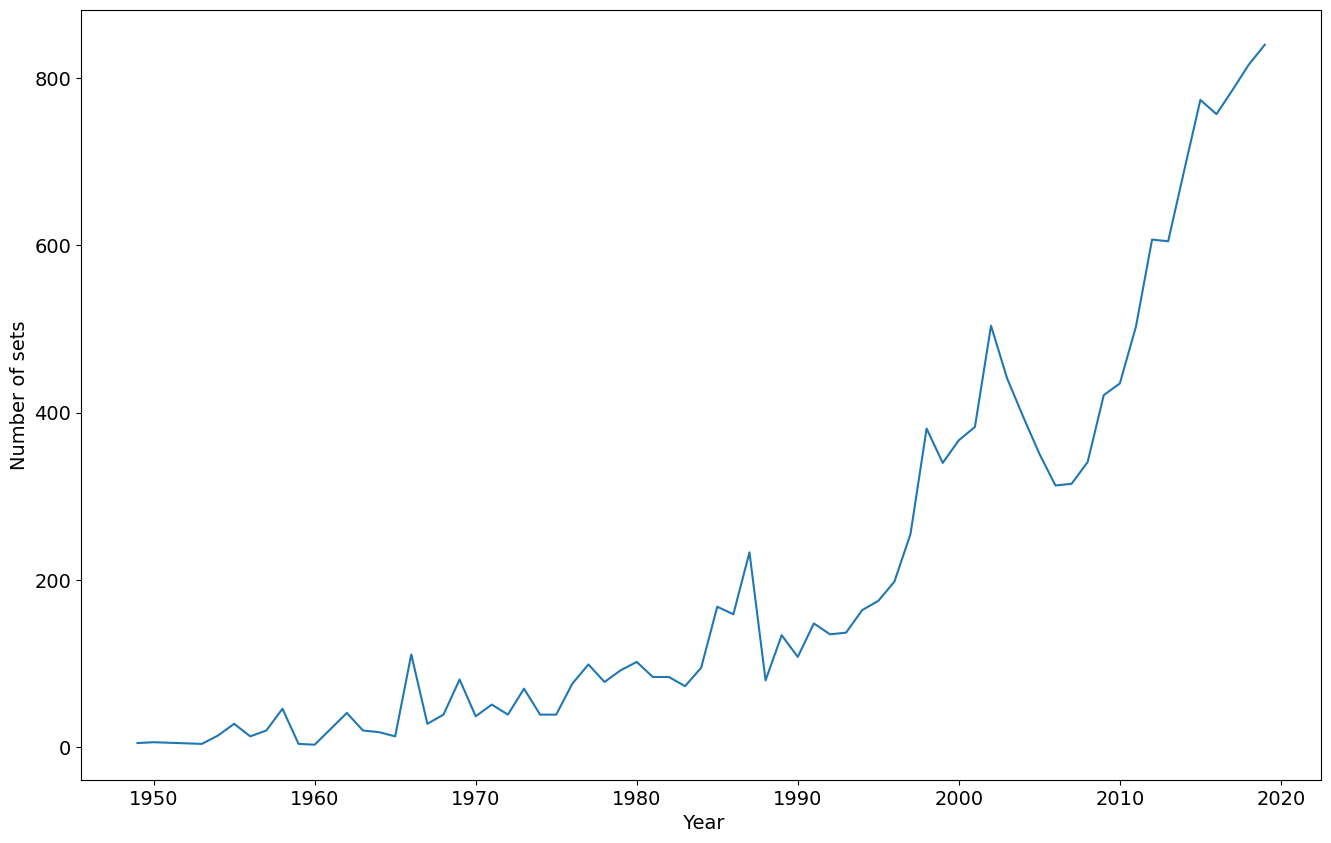

In [38]:
#==========================================================Drawing the data==================================================================================#
import matplotlib.pyplot as plt


# Sizing of the chart 
plt.figure(figsize = (16, 10))

# Features 
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel(" Year", fontsize = 14)
plt.ylabel("Number of sets", fontsize = 14)

# plot features
plt.plot(sets_dataset1.index[:-2] , sets_dataset1["set_num"][:-2])

### Use of Aggregate function()

**Challenge**:Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.  <br>
<br>


In [39]:
sets_dataset2 = sets_dataset.groupby("year").agg({"theme_id": "nunique"})

            # Generally good to do .reset index so that it returns back to normal 
            # sets_dataset1 = sets_dataset.groupby("year").agg({"theme_id": "nunique"}).reset_index()
print(sets_dataset2)

      theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        89
2018        93
2019        78
2020        82
2021         1

[71 rows x 1 columns]


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

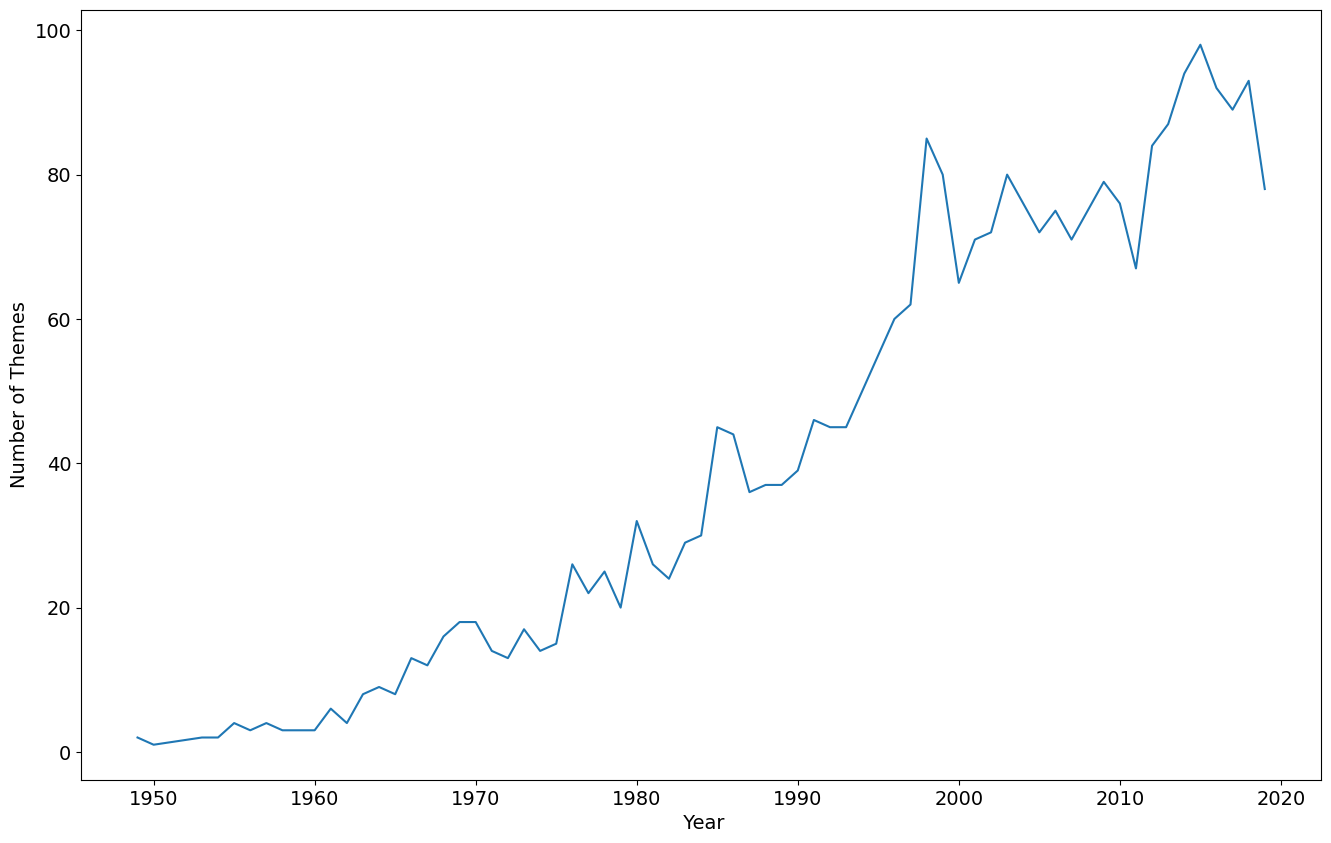

In [40]:
#==========================================================Drawing the data==================================================================================#
import matplotlib.pyplot as plt


# Sizing of the chart 
plt.figure(figsize = (16, 10))

# Features 
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel(" Year", fontsize = 14)
plt.ylabel("Number of Themes", fontsize = 14)

# plot features
plt.plot(sets_dataset2.index[:-2] , sets_dataset2["theme_id"][:-2])

### Line Charts with Two Seperate Axes on either side. 

Text(0, 0.5, 'Number of Themes')

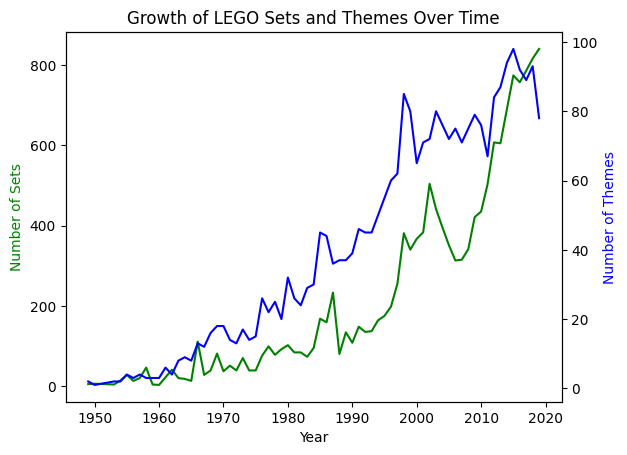

In [41]:
# Name of the chart 
plt.title("Growth of LEGO Sets and Themes Over Time")

# get the axis
ax1 = plt.gca() 
 # create another axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot sets 
ax1.plot(sets_dataset1.index[:-2], 
         sets_dataset1["set_num"][:-2], 
         color= "green" 
         )  
# Plot themes 
ax2.plot(sets_dataset2.index[:-2], 
         sets_dataset2["theme_id"][:-2], 
         color = "blue"
         )
#                           # Sliced to exclude the dip in the data. 

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')



**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per year. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [42]:
print(sets_dataset)
average_parts_per_year=sets_dataset.groupby("year").agg({"num_parts":"mean"})
print(average_parts_per_year)

       set_num                               name  year  theme_id  num_parts
9545   700.B-1  Small Doors and Windows Set (ABB)  1949       371         12
9521   700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9539   700.3-1              Medium Gift Set (ABB)  1949       365        142
9544   700.A-1              Small Brick Set (ABB)  1949       371         24
9534   700.2-1               Large Gift Set (ABB)  1949       365        178
...        ...                                ...   ...       ...        ...
5399   41919-1                     Power Bracelet  2020       688         33
8217   60265-1             Ocean Exploration Base  2020        52        495
11335  75547-1           Minion Pilot in Training  2021       689          0
11337  75550-1             Minions Kung Fu Battle  2021       689          0
11334  75546-1               Minions in Gru’s Lab  2021       689          0

[15710 rows x 5 columns]
       num_parts
year            
1949   99.600000

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

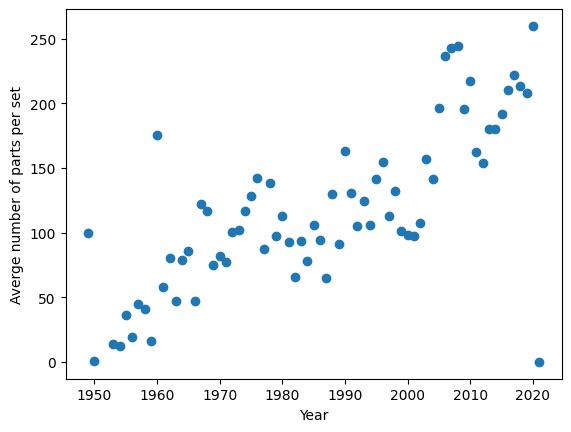

In [43]:
plt.ylabel("Averge number of parts per set")
plt.xlabel("Year")
#scatter diagram:
plt.scatter(average_parts_per_year.index, average_parts_per_year["num_parts"])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? Is it one of LEGO's own themes like Ninjago or Technic or is it a third party theme? Let's analyse LEGO's product lines!

In [ ]:
sets_per_theme = sets_dataset[ "theme_id"].value_counts()


theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
411      1
530      1
361      1
383      1
370      1
Name: count, Length: 571, dtype: int64

# Working with a Relational Database

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png*

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [64]:
import pandas as pd

themes_dataset =  pd.read_csv("./Data/themes.csv")


# Top level check of the data: 
themes_dataset.head()
themes_dataset.tail()
themes_dataset.shape
themes_dataset.columns

# How many names correspond to Star wars 
Star_wars = themes_dataset[themes_dataset["name"]=="Star Wars"]

    # Pulling the ids for the items that correxpond to star wars 
list = Star_wars["id"].tolist()
    # looking for it in the sets database. 
for i in list:
    print(sets_dataset[sets_dataset["theme_id"]==i])


       set_num                                name  year  theme_id  num_parts
12058   8001-1                        Battle Droid  2000        18        336
12051   8000-1                           Pit Droid  2000        18        223
12066   8002-1                     Destroyer Droid  2000        18        567
12072   8008-1                        Stormtrooper  2001        18        360
12071   8007-1                               C-3PO  2001        18        339
15273  K8008-1      Darth Vader / Stormtrooper Kit  2002        18          0
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
        set_num                          name  year  theme_id  n

### Merging (i.e., Combining) DataFrames based on a Key

In essence- the id's match between themes id and sets id. Therefore, the next step would be to merge them. 

In [69]:
# changing the set theme count filter into a datframe. 
set_theme_count  = pd.DataFrame({"id" : sets_per_theme.index,
                                 "set_count": sets_per_theme.values})
print(set_theme_count)

      id  set_count
0    158        753
1    501        656
2    494        398
3    435        356
4    503        329
..   ...        ...
566  411          1
567  530          1
568  361          1
569  383          1
570  370          1

[571 rows x 2 columns]


To .merge() two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set on='id'. Both our set_theme_count and our themes DataFrames have a column with this name.

In [ ]:
merged_df = pd.merge(set_theme_count, themes_dataset, on= "id")
                                                                    # Common unit between them would be the id. Hence,use it to produce a final dataset. 
print(merged_df)

      id  set_count            name  parent_id
0    158        753       Star Wars        NaN
1    501        656            Gear        NaN
2    494        398         Friends        NaN
3    435        356         Ninjago        NaN
4    503        329       Key Chain      501.0
..   ...        ...             ...        ...
566  411          1        Legoland        NaN
567  530          1     Control Lab      529.0
568  361          1   Skull Spiders      324.0
569  383          1  Wooden Box Set      365.0
570  370          1          Mosaic      365.0

[571 rows x 4 columns]


### Creating a bar chart with the data 

<BarContainer object of 10 artists>

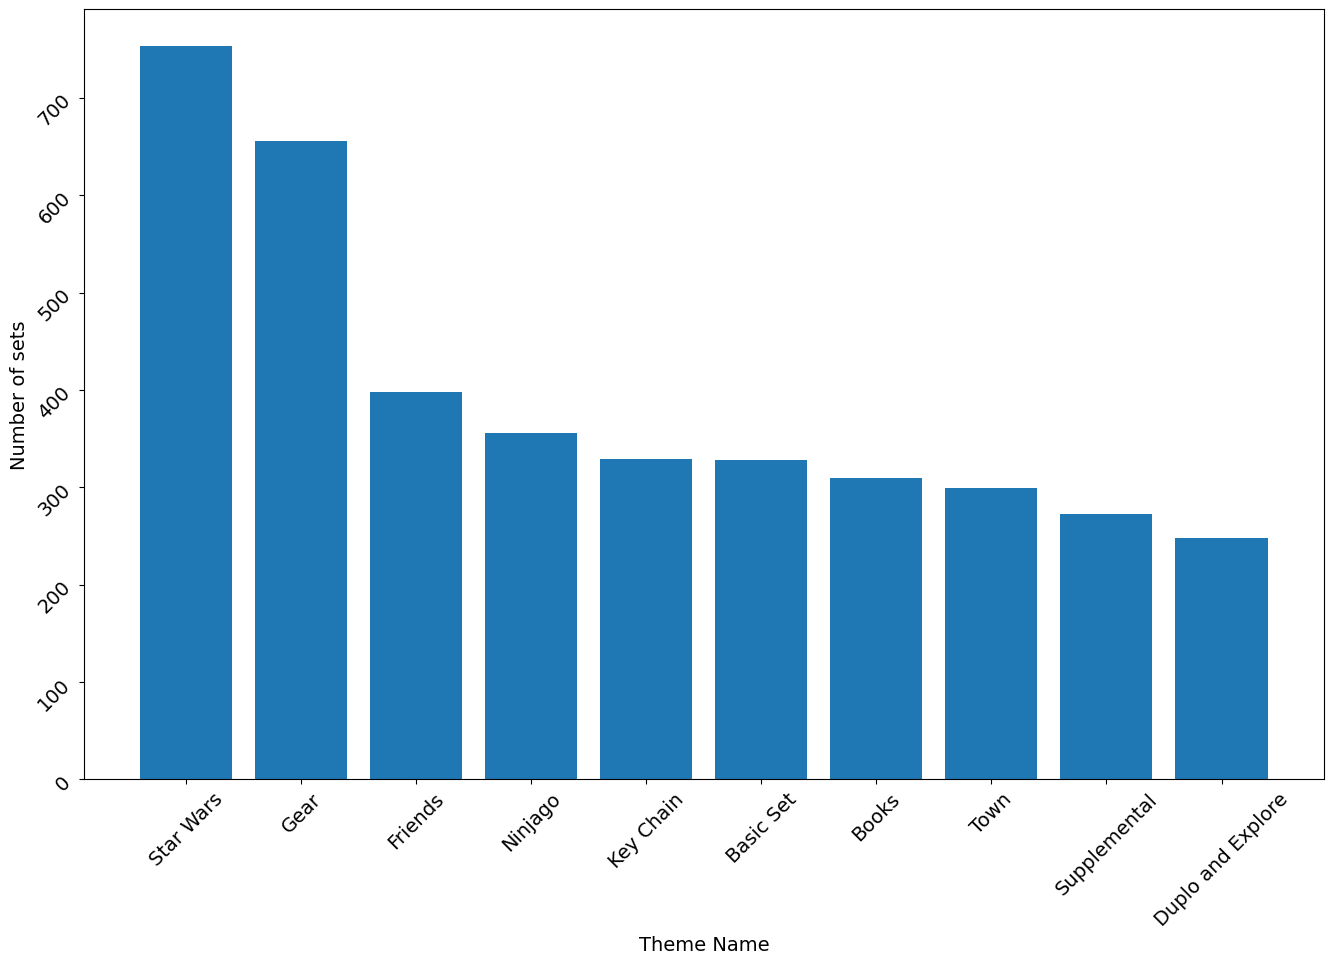

In [74]:
#use the data to create a bar chart. Same parameters as the other diagrams functions. 

# sizing 
plt.figure(figsize =(16, 10))

#x and Y 
plt.xticks( fontsize  = 14, rotation = 45)
plt.yticks( fontsize  = 14, rotation = 45)

plt.xlabel("Theme Name", fontsize = 14)
plt.ylabel("Number of sets", fontsize = 14)

# Functions 
plt.bar(merged_df["name"][:10], merged_df["set_count"][:10])